# Taller Bagging
Andres Useche

Juan Soto

Rafael Torregroza

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/datos_pacientes.csv')

EXPLORACIÓN Y PREPROCESAMIENTO DE DATOS

In [4]:
display(df.head())
display(df.info())


,Edad,Sexo,IMC,Frecuencia_Cardiaca,Colesterol,Presion_Sanguinea,Actividad_Fisica,Historial_Familiar,Nivel_Glucosa,Fumar,Riesgo
0,58,masculino,28.7,105,medio,126,alto,no,104.4,fumador,alto
1,71,femenino,36.5,85,alto,139,bajo,sí,146.2,fumador,alto
2,48,masculino,30.2,68,alto,144,bajo,no,89.7,nunca,bajo
3,34,femenino,21.5,93,alto,144,moderado,sí,121.2,exfumador,alto
4,62,femenino,31.8,79,medio,121,alto,sí,136.0,nunca,bajo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Edad                 100000 non-null  int64  
 1   Sexo                 100000 non-null  object 
 2   IMC                  100000 non-null  float64
 3   Frecuencia_Cardiaca  100000 non-null  int64  
 4   Colesterol           100000 non-null  object 
 5   Presion_Sanguinea    100000 non-null  int64  
 6   Actividad_Fisica     100000 non-null  object 
 7   Historial_Familiar   100000 non-null  object 
 8   Nivel_Glucosa        100000 non-null  float64
 9   Fumar                100000 non-null  object 
 10  Riesgo               100000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB


None

In [5]:
display(df.describe())
display(df.isnull().sum())

,Edad,IMC,Frecuencia_Cardiaca,Presion_Sanguinea,Nivel_Glucosa
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49.545230,29.001084,89.522090,134.507700,109.901083
std,17.310892,6.352961,17.311142,25.990615,23.100799
min,20.000000,18.000000,60.000000,90.000000,70.000000
25%,35.000000,23.500000,75.000000,112.000000,89.800000
50%,49.000000,29.000000,90.000000,134.000000,109.900000
75%,65.000000,34.500000,104.000000,157.000000,129.900000
max,79.000000,40.000000,119.000000,179.000000,150.000000


,0
Edad,0
Sexo,0
IMC,0
Frecuencia_Cardiaca,0
Colesterol,0
Presion_Sanguinea,0
Actividad_Fisica,0
Historial_Familiar,0
Nivel_Glucosa,0
Fumar,0


In [6]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Conteo de {col}:")
    print(df[col].value_counts())
    print("-" * 40)



Conteo de Sexo:
Sexo
femenino     50055
masculino    49945
Name: count, dtype: int64
----------------------------------------
Conteo de Colesterol:
Colesterol
alto     33444
medio    33353
bajo     33203
Name: count, dtype: int64
----------------------------------------
Conteo de Actividad_Fisica:
Actividad_Fisica
moderado    33442
bajo        33314
alto        33244
Name: count, dtype: int64
----------------------------------------
Conteo de Historial_Familiar:
Historial_Familiar
sí    50232
no    49768
Name: count, dtype: int64
----------------------------------------
Conteo de Fumar:
Fumar
nunca        33491
fumador      33348
exfumador    33161
Name: count, dtype: int64
----------------------------------------
Conteo de Riesgo:
Riesgo
bajo    70024
alto    29976
Name: count, dtype: int64
----------------------------------------


<ipython-input-7-ff4b905571a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


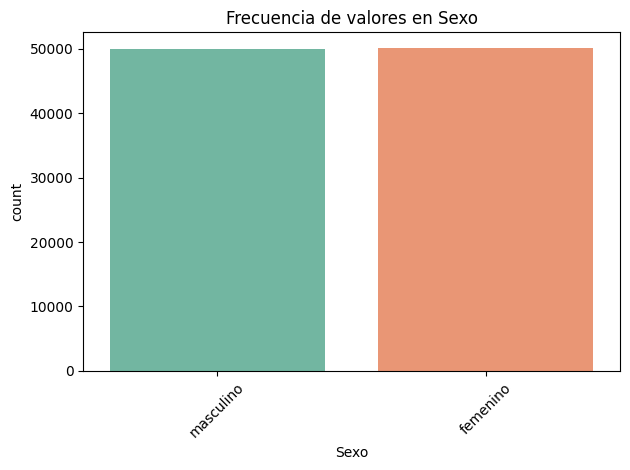

<ipython-input-7-ff4b905571a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


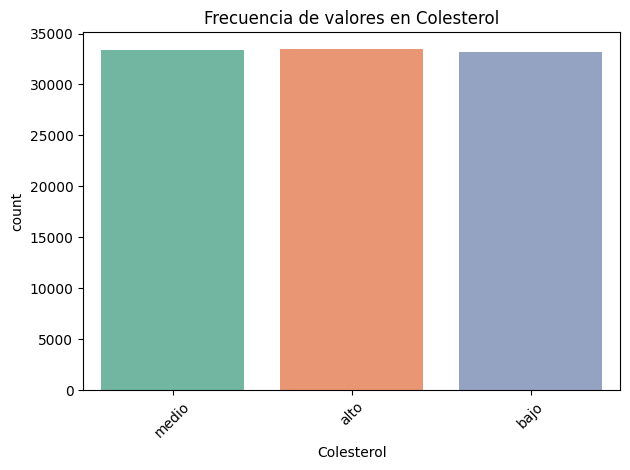

<ipython-input-7-ff4b905571a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


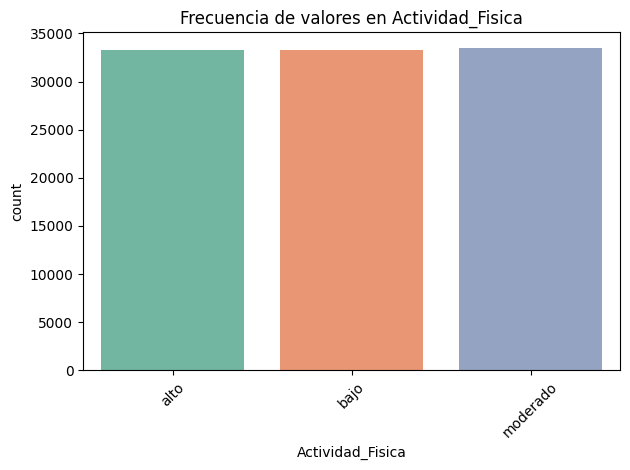

<ipython-input-7-ff4b905571a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


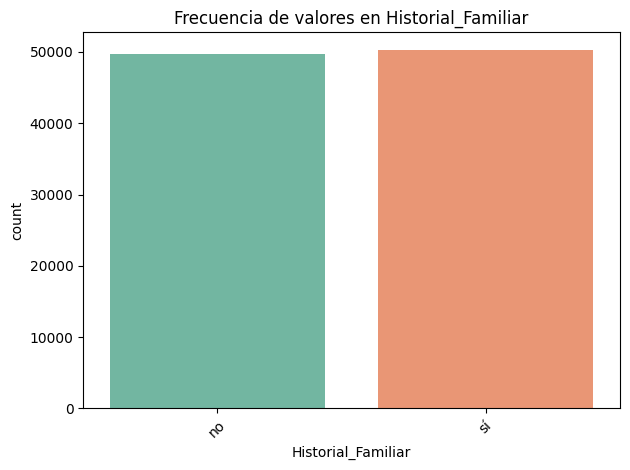

<ipython-input-7-ff4b905571a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


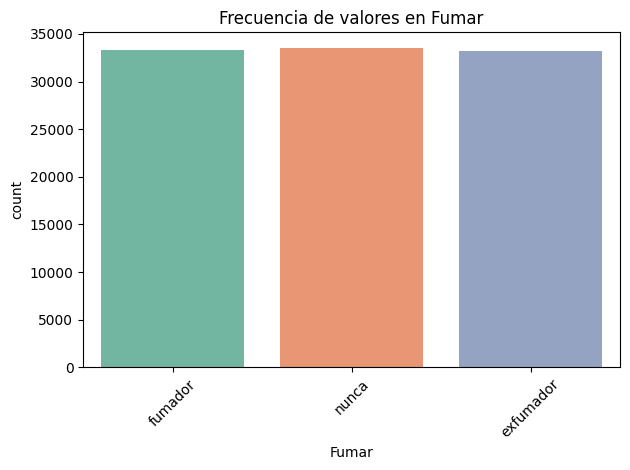

<ipython-input-7-ff4b905571a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


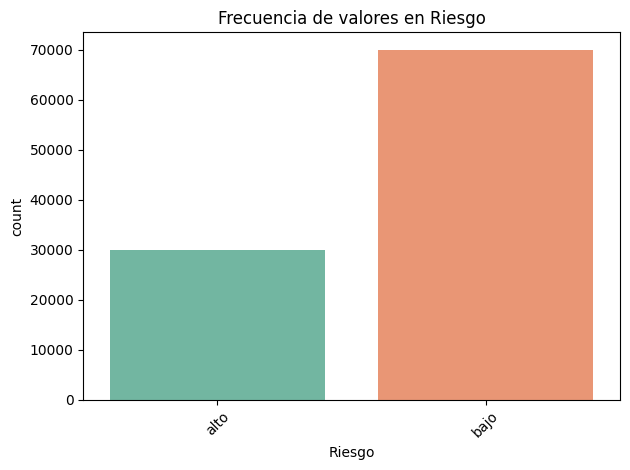

In [7]:

categorical_cols = df.select_dtypes(include=['object']).columns


for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Frecuencia de valores en {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
le = LabelEncoder()


for col in ['Sexo', 'Historial_Familiar', 'Fumar', 'Riesgo']:
    le.fit(df[col])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapeo de categorías para {col}: {mapping}")
    print("-" * 40)


Mapeo de categorías para Sexo: {'femenino': np.int64(0), 'masculino': np.int64(1)}
----------------------------------------
Mapeo de categorías para Historial_Familiar: {'no': np.int64(0), 'sí': np.int64(1)}
----------------------------------------
Mapeo de categorías para Fumar: {'exfumador': np.int64(0), 'fumador': np.int64(1), 'nunca': np.int64(2)}
----------------------------------------
Mapeo de categorías para Riesgo: {'alto': np.int64(0), 'bajo': np.int64(1)}
----------------------------------------


In [9]:


df['Colesterol'] = df['Colesterol'].map({'bajo': 0, 'medio': 1, 'alto': 2})
df['Actividad_Fisica'] = df['Actividad_Fisica'].map({'bajo': 0, 'moderado': 1, 'alto': 2})


le = LabelEncoder()
for col in ['Sexo', 'Historial_Familiar', 'Fumar', 'Riesgo']:
    df[col] = le.fit_transform(df[col])

In [10]:
X = df.drop('Riesgo', axis=1)
y = df['Riesgo']


PRIMER MODELO, en donde tenga encuenta el balanceo de clases Con 100 submuestras

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:


# Árbol base con pesos balanceados (importante si hay desbalance)
base_tree = DecisionTreeClassifier( class_weight='balanced')

# Bagging con 100 árboles
model1 = BaggingClassifier(estimator=base_tree, n_estimators=100, random_state=42)

# Entrenamiento
model1.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'),
                  n_estimators=100, random_state=42)

In [13]:


y_pred = model1.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[   55  5956]
 [  160 13829]]
              precision    recall  f1-score   support

           0       0.26      0.01      0.02      6011
           1       0.70      0.99      0.82     13989

    accuracy                           0.69     20000
   macro avg       0.48      0.50      0.42     20000
weighted avg       0.57      0.69      0.58     20000



In [14]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6942


El modelo predice mejor cuando una persona no tiene riesgo cardiovascular, comparado con personas que si tienen riesgo, es decir, Solo se detecta 1% de los verdaderos positivos y la Precision: 0.26 De los pocos que predice como riesgo, la mayoría son falsos. Por lo cual es un muy mal modelo ya que es mas impportante predecir cuando una persona tiene riesgo

Se probo con 1000 muestras pero los resultados no cambiaron demasiado

# Para tener una idea de la clasificación, se reducieran las variables independientes a dos dimensiones para visualizarlas y ver la forntera decisión.

In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Combinamos entrenamiento y prueba para visualizar todo el espacio
X_total = np.vstack((X_train, X_test))
y_total = np.hstack((y_train, y_test))

# PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_total_pca = pca.fit_transform(X_total)

# División equivalente post-PCA
X_train_pca = X_total_pca[:len(X_train)]
X_test_pca = X_total_pca[len(X_train):]


In [20]:

model_viz = BaggingClassifier(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    n_estimators=10,  # menos árboles para visualizar
    random_state=42
)
model_viz.fit(X_train_pca, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'),
                  random_state=42)

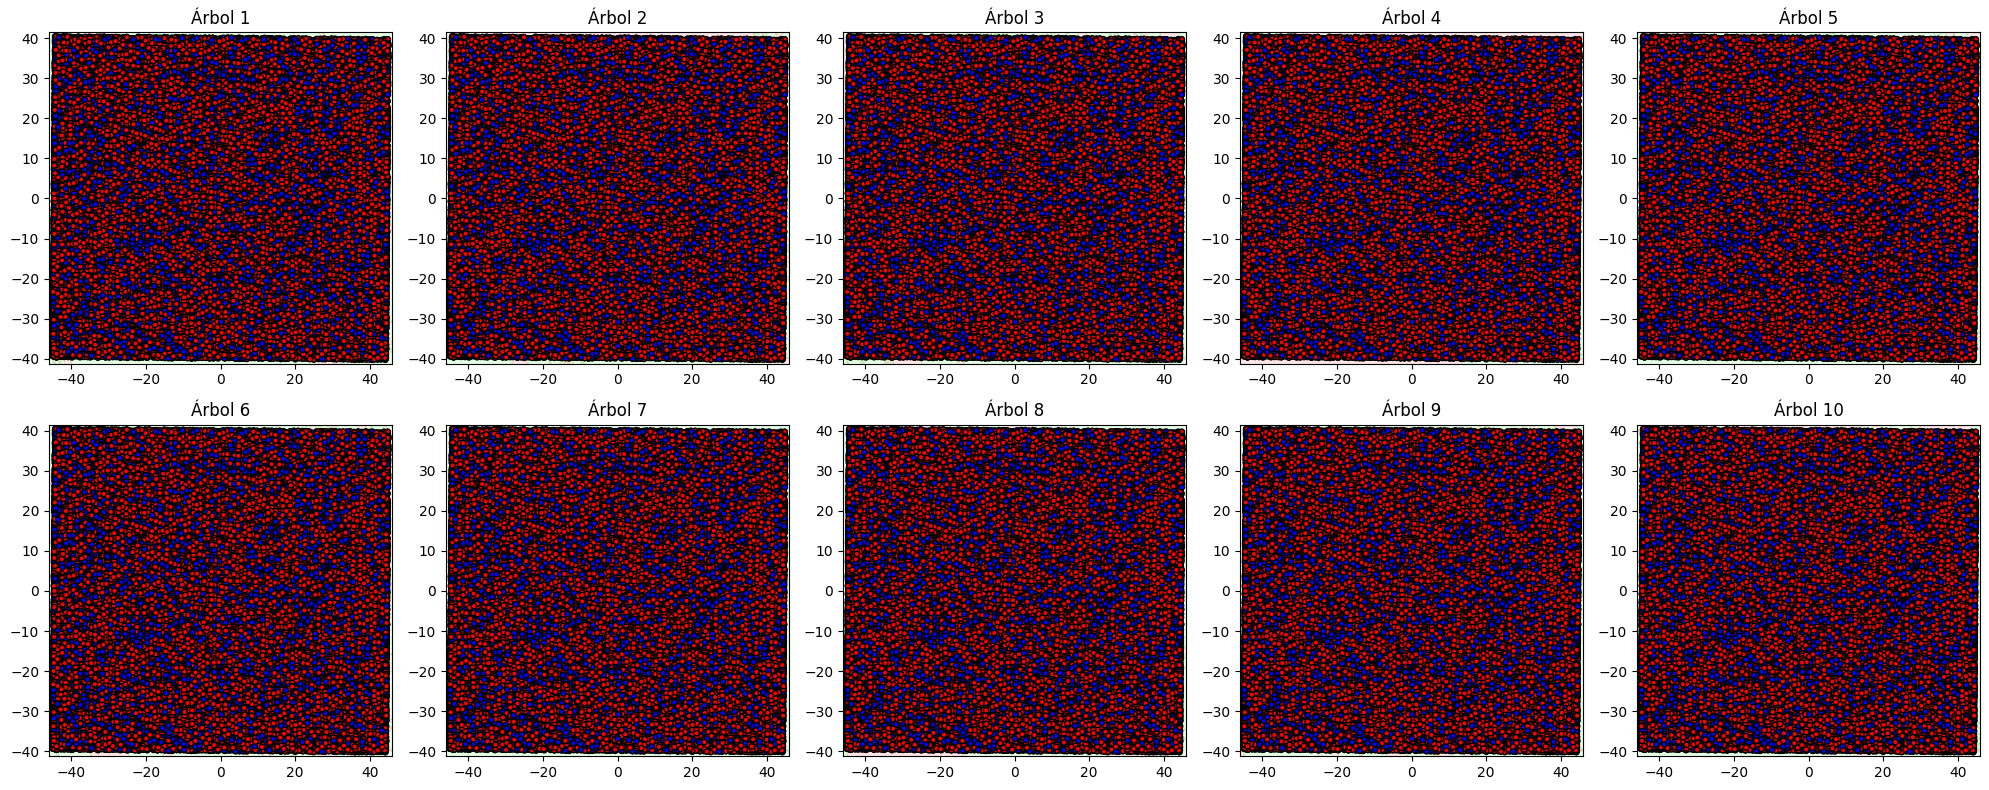

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Malla para graficar
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
mesh = np.c_[xx.ravel(), yy.ravel()]

# Fronteras de árboles individuales
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, tree in enumerate(model_viz.estimators_[:10]):
    Z = tree.predict(mesh)
    Z = Z.reshape(xx.shape)

    ax = axes[i // 5, i % 5]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='bwr', s=15)
    ax.set_title(f"Árbol {i+1}")

plt.tight_layout()
plt.show()


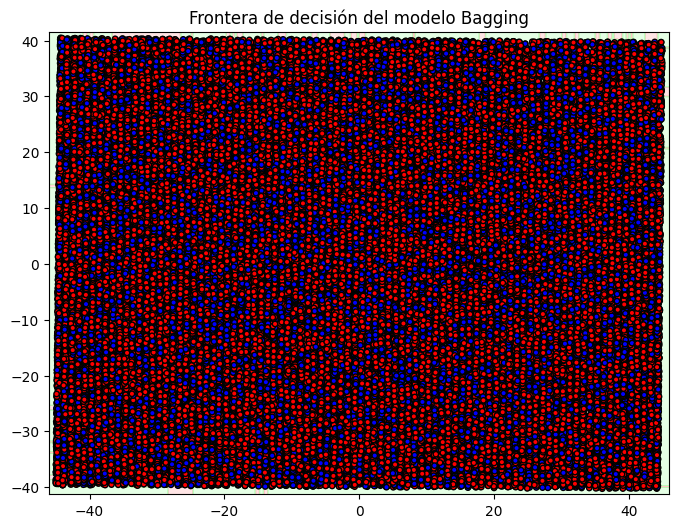

In [22]:
# Frontera de decisión del ensamble final
Z_ensemble = model_viz.predict(mesh)
Z_ensemble = Z_ensemble.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_ensemble, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='bwr', s=15)
plt.title("Frontera de decisión del modelo Bagging")
plt.show()


2 Modelo sin balanceo de clases

In [23]:

base_tree_unbalanced = DecisionTreeClassifier()


model_unbalanced = BaggingClassifier(estimator=base_tree_unbalanced, n_estimators=100, random_state=42)


model_unbalanced.fit(X_train, y_train)


y_pred_unbalanced = model_unbalanced.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Sin class_weight='balanced':")
print(confusion_matrix(y_test, y_pred_unbalanced))
print(classification_report(y_test, y_pred_unbalanced))
print(f'Accuracy: {accuracy_score(y_test, y_pred_unbalanced):.4f}')


Sin class_weight='balanced':
[[  146  5865]
 [  282 13707]]
              precision    recall  f1-score   support

           0       0.34      0.02      0.05      6011
           1       0.70      0.98      0.82     13989

    accuracy                           0.69     20000
   macro avg       0.52      0.50      0.43     20000
weighted avg       0.59      0.69      0.58     20000

Accuracy: 0.6926


El modelo sin balancear, obtuvo mejor rendimiento en las metricas con respecto al anterior sin embargo, siguen sin ser las optimas.

Tercer modelo con aumentación de datos con la tecnica SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [25]:

print("Antes del SMOTE:")
print(y_train.value_counts())
print("\nDespués del SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Antes del SMOTE:
Riesgo
1    56035
0    23965
Name: count, dtype: int64

Después del SMOTE:
Riesgo
1    56035
0    56035
Name: count, dtype: int64


In [26]:

model2 = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
model2.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [27]:

# Predicción
y_pred = model2.predict(X_test)

print("Sin class_weight='balanced':")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')


Sin class_weight='balanced':
[[1809 4202]
 [4236 9753]]
              precision    recall  f1-score   support

           0       0.30      0.30      0.30      6011
           1       0.70      0.70      0.70     13989

    accuracy                           0.58     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.58      0.58      0.58     20000

Accuracy: 0.5781


Este modelo ahora sí está reconociendo la clase 0 (riesgo cardiovascular), aunque con sacrificio de exactitud global.
El recall subio de 0.02 a 0.30, Sin embargo este modelo tampoco es optimo

Intento con Un modelo de RndomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(class_weight='balanced', random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[   34  5977]
 [   92 13897]]
              precision    recall  f1-score   support

           0       0.27      0.01      0.01      6011
           1       0.70      0.99      0.82     13989

    accuracy                           0.70     20000
   macro avg       0.48      0.50      0.42     20000
weighted avg       0.57      0.70      0.58     20000



In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred3)


np.float64(0.49953985044622184)

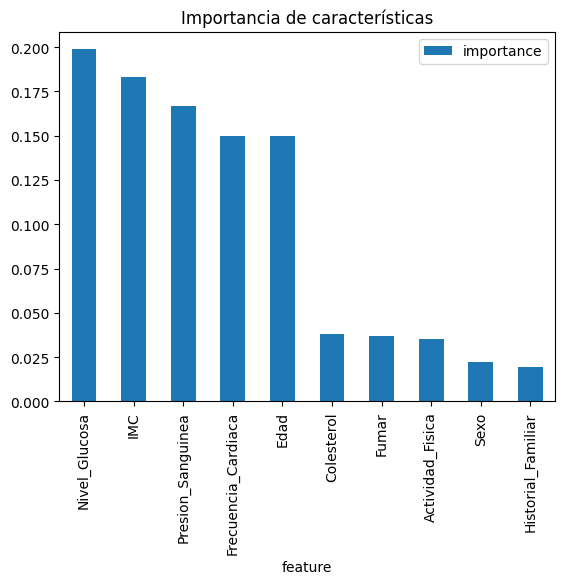

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model3.feature_importances_
features = X_train.columns
df_importance = pd.DataFrame({'feature': features, 'importance': importances})
df_importance.sort_values(by='importance', ascending=False).plot(kind='bar', x='feature', y='importance')
plt.title('Importancia de características')
plt.show()


Todas las variables aportan al modelo en cierta medida

MODELO con 10 arboles, solo para hacer vizualización

In [32]:
from sklearn.decomposition import PCA

# Suponiendo que X es tu DataFrame con todas las variables
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X debe estar estandarizado

# Si necesitas una versión reducida para visualización
import numpy as np
sample_indices = np.random.choice(range(len(X_pca)), size=1000, replace=False)
X_sample = X_pca[sample_indices]
y_sample = y.values[sample_indices]


In [33]:

model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=10,  # Menos árboles para visualizar
    random_state=42
)
model.fit(X_sample, y_sample)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  random_state=42)

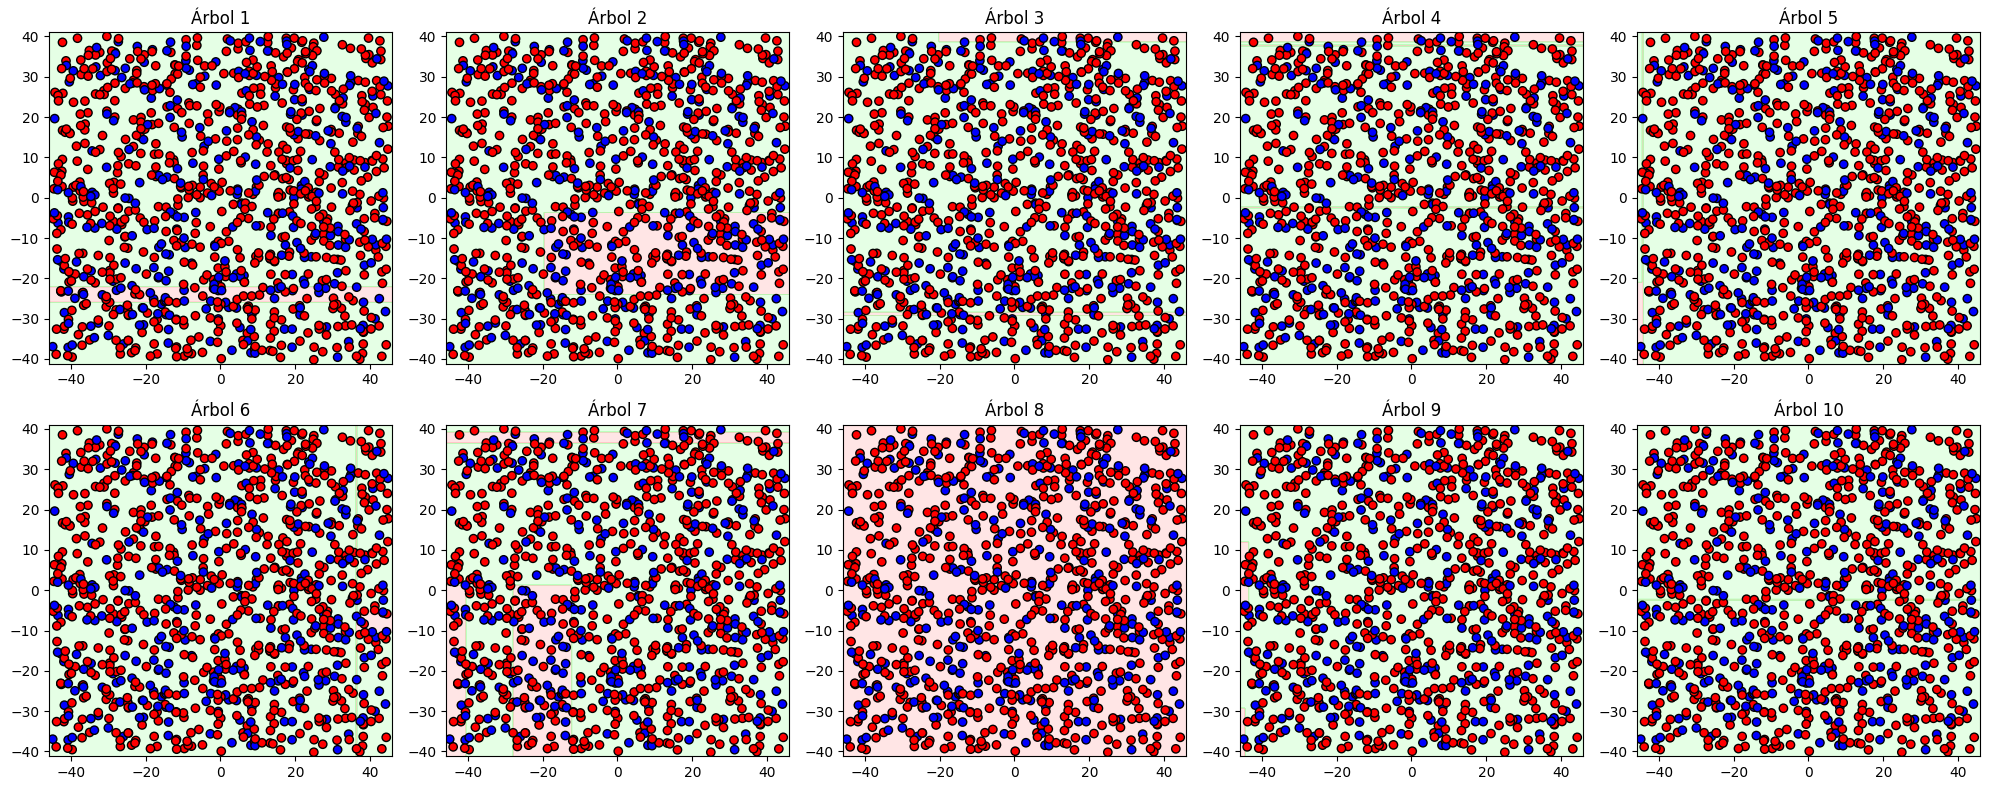

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Crear malla
x_min, x_max = X_sample[:, 0].min() - 1, X_sample[:, 0].max() + 1
y_min, y_max = X_sample[:, 1].min() - 1, X_sample[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
mesh = np.c_[xx.ravel(), yy.ravel()]

# Fronteras de árboles individuales
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, tree in enumerate(model.estimators_[:10]):
    Z = tree.predict(mesh)
    Z = Z.reshape(xx.shape)

    ax = axes[i // 5, i % 5]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    ax.scatter(X_sample[:, 0], X_sample[:, 1], c=y_sample, edgecolor='k', cmap='bwr')
    ax.set_title(f"Árbol {i+1}")

plt.tight_layout()
plt.show()


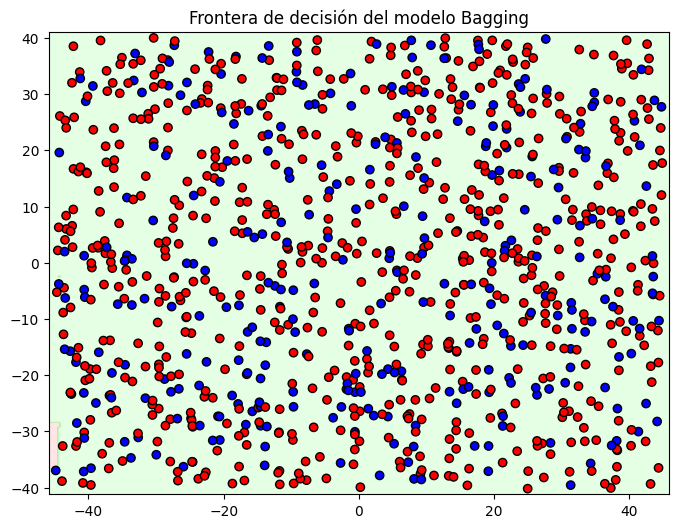

In [24]:
Z_ensemble = model.predict(mesh)
Z_ensemble = Z_ensemble.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_ensemble, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=y_sample, edgecolor='k', cmap='bwr')
plt.title("Frontera de decisión del modelo Bagging")
plt.show()


Se observa que los individuos sin riesgo vascular y los que tienen risgo vascular estan muy dispersos entre si, suponemos que por esto mismo no logra establecer una frontera de decisión entre las personas que tienen riesgo cardiovascular y las que no lo tienen. Por ende existiran casos en los cuales utlizar metodos de clasificación como Bagging, no sera la mejor opción